In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random as random

1. **Initialize**: Determine the number of clusters (K) you want to partition your data into. Randomly initialize K cluster centroids. These centroids can be randomly selected data points or placed at random locations within the feature space.

2. **Assign Data Points to Clusters**: For each data point, calculate the distance to each centroid using a distance metric such as Euclidean distance. Assign each data point to the cluster whose centroid is closest to it.

3. **Update Centroids**: After all data points have been assigned to clusters, calculate the mean of the data points in each cluster. This will be the new centroid for that cluster.

4. **Repeat**: Repeat steps 2 and 3 until convergence criteria are met. Convergence can be defined by several conditions, such as no (or minimal) change in cluster assignments or centroids, a maximum number of iterations reached, or a predefined threshold for centroid movement.

5. **Convergence Criteria**: Decide on a stopping criterion to end the iterative process. Common criteria include a maximum number of iterations, a minimum change in centroid positions, or when the cluster assignments no longer change.

6. **Finalize Clusters**: Once the algorithm converges, the clusters are finalized. Each data point is assigned to one of the K clusters.

7. **Evaluation (Optional)**: If ground truth labels are available, you can evaluate the quality of the clustering using metrics such as the Silhouette Score or the Davies–Bouldin Index. These metrics measure the compactness and separation of the clusters.

8. **Parameter Tuning (Optional)**: Experiment with different initializations, distance metrics, and numbers of clusters to find the optimal clustering solution for your data.

By following these steps, you can implement a basic K-means clustering algorithm from scratch. Remember that K-means is sensitive to initialization, and different initializations may lead to different final cluster assignments. Therefore, it's often a good practice to run the algorithm multiple times with different initializations and choose the solution with the lowest objective function value or the best clustering quality metric.


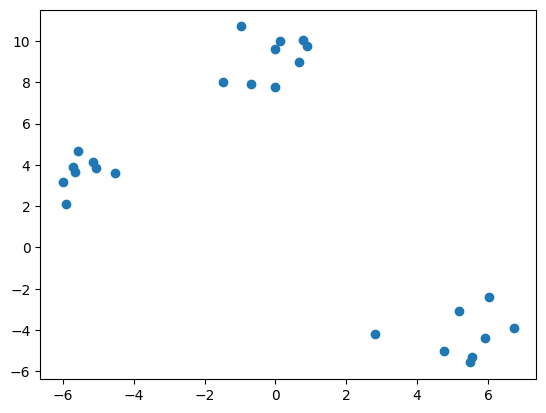

In [165]:
n_samples = 25
n_centroids = 3
X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = n_centroids,random_state = 23)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [166]:
print(X)

[[ 5.17292843e+00 -3.08483491e+00]
 [ 6.72451517e+00 -3.89437214e+00]
 [-5.91070986e+00  2.09205542e+00]
 [-1.50131409e-03  9.60939224e+00]
 [ 6.68229197e-01  8.99959501e+00]
 [ 8.84119643e-01  9.75137075e+00]
 [ 6.03807103e+00 -2.38364839e+00]
 [-9.76189846e-01  1.07115104e+01]
 [ 2.80296487e+00 -4.20512263e+00]
 [-5.99993669e+00  3.17245314e+00]
 [-5.06695534e+00  3.85598017e+00]
 [ 1.44117155e-01  9.98462335e+00]
 [-5.15847007e+00  4.13606135e+00]
 [-5.70019028e+00  3.91458306e+00]
 [ 5.91539068e+00 -4.37462201e+00]
 [-1.49211009e+00  8.00048345e+00]
 [ 7.87694049e-01  1.00681289e+01]
 [ 5.55030149e+00 -5.30459265e+00]
 [ 4.76140718e+00 -5.03150139e+00]
 [-5.56567048e+00  4.66038660e+00]
 [-2.15904392e-02  7.80179239e+00]
 [-4.53820676e+00  3.63040697e+00]
 [-5.65041666e+00  3.67900413e+00]
 [-6.97492325e-01  7.92931020e+00]
 [ 5.48282883e+00 -5.57533789e+00]]


In [167]:
random_centroids = np.random.sample(1)
random_centroids

array([0.20864664])

In [168]:
random_centroids = np.random.choice(n_samples, size=3)
random_centroids

array([11, 17, 24])

In [169]:
random_centroids = np.random.randint(0,n_samples,n_centroids)
random_centroids

array([13, 22,  0])

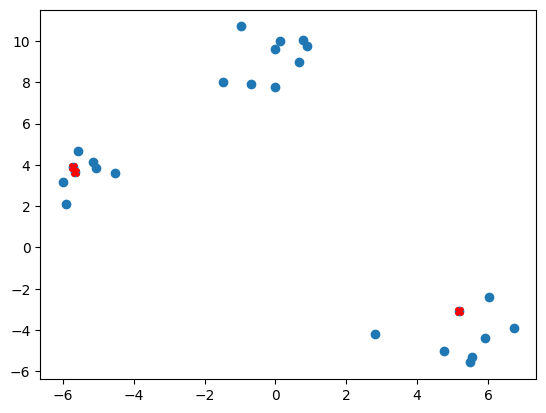

In [170]:
plt.scatter(X[:,0],X[:,1])
for i in range(len(random_centroids)):
  index = random_centroids[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')
plt.show()

In [171]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2))

In [236]:
def assign_to_centroid(random_centroids):
  collection_points_per_cluster = [[] for _ in range(n_centroids)]
  assign_centroid = np.zeros(n_samples)
  # print(assign_centroid)
  j_hist = np.zeros(shape=(n_samples,n_centroids))
  # Assign to centroid
  for i in range(n_samples):
    data = np.array((X[i,0], X[i,1]))
    # print("DATA", data)
    for j in range(n_centroids):
      j_centroid = random_centroids[j]
      point = np.array((X[j_centroid,0], X[j_centroid,1]))
      dist = euclidean(data,point)
      j_hist[i,j] = dist
    assign_centroid[i] = j_hist[i].argmin()
    collection_points_per_cluster[j_hist[i].argmin()].append(data)

  return assign_centroid,j_hist, collection_points_per_cluster


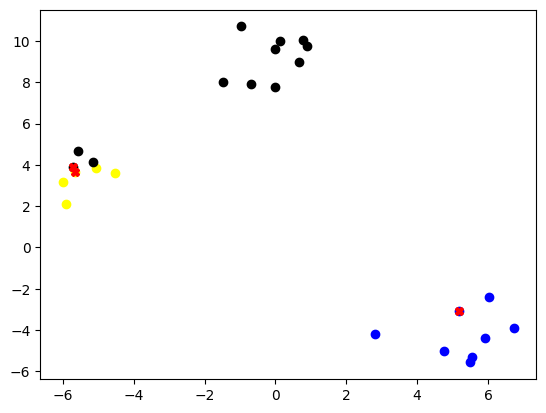

In [244]:
assign_centroid,j_hist,collection_points_per_cluster = assign_to_centroid(random_centroids)

collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)

for i in range(len(random_centroids)):
  index = random_centroids[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')

for i in range(n_samples):
  x = X[i,0]
  y = X[i,1]
  if(assign_centroid[i] == 0):
    plt.scatter(x,y, color='black', label='0')
  elif(assign_centroid[i] == 1):
    plt.scatter(x,y, color='yellow', label='1')
  elif(assign_centroid[i] == 2):
    plt.scatter(x,y, color='blue', label='2')

plt.show()

In [247]:
collection_points_per_cluster

array([array([[-1.50131409e-03,  9.60939224e+00],
              [ 6.68229197e-01,  8.99959501e+00],
              [ 8.84119643e-01,  9.75137075e+00],
              [-9.76189846e-01,  1.07115104e+01],
              [ 1.44117155e-01,  9.98462335e+00],
              [-5.15847007e+00,  4.13606135e+00],
              [-5.70019028e+00,  3.91458306e+00],
              [-1.49211009e+00,  8.00048345e+00],
              [ 7.87694049e-01,  1.00681289e+01],
              [-5.56567048e+00,  4.66038660e+00],
              [-2.15904392e-02,  7.80179239e+00],
              [-6.97492325e-01,  7.92931020e+00]]),
       array([[-5.91070986,  2.09205542],
              [-5.99993669,  3.17245314],
              [-5.06695534,  3.85598017],
              [-4.53820676,  3.63040697],
              [-5.65041666,  3.67900413]]),
       array([[ 5.17292843, -3.08483491],
              [ 6.72451517, -3.89437214],
              [ 6.03807103, -2.38364839],
              [ 2.80296487, -4.20512263],
              [ 5.

In [312]:
def find_cluster_mean():
  cluster_means = np.zeros(shape=(n_centroids, 2))

  for i in range(n_centroids):
    x_sum = 0
    y_sum = 0
    n = 0
    points = collection_points_per_cluster[i]
    for j in range(len(points)):
      x_y = collection_points_per_cluster[i][j]
      x_sum += x_y[0]
      y_sum += x_y[1]
      n += 1
    x_mean = x_sum / n
    y_mean = y_sum / n
    cluster_means[i,0] = x_mean
    cluster_means[i,1] = y_mean
  return cluster_means

In [313]:
cluster_mean = find_cluster_mean()
cluster_mean

array([[-1.42742123,  7.96393647],
       [-5.43324506,  3.28597997],
       [ 5.30605096, -4.231754  ]])

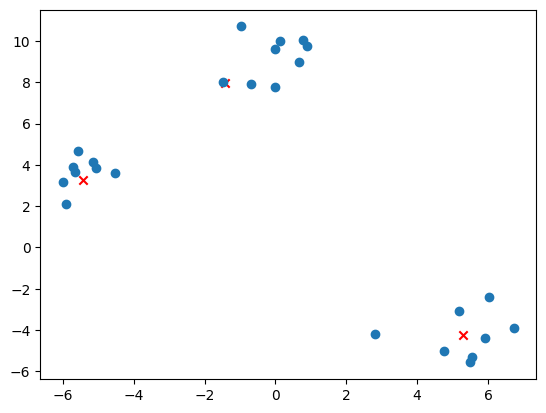

In [314]:
plt.scatter(cluster_mean[:,0], cluster_mean[:,1], marker='x', color='red')
plt.scatter(X[:,0], X[:,1])

In [323]:
x_test = X[:,0]
a = cluster_mean[0,0]
index = (np.abs(x_test - a)).argmin()
print('x_test',X[:,0])
print('a', a)
print('index',index)
print('num in index',X[index,0])

x_test [ 5.17292843e+00  6.72451517e+00 -5.91070986e+00 -1.50131409e-03
  6.68229197e-01  8.84119643e-01  6.03807103e+00 -9.76189846e-01
  2.80296487e+00 -5.99993669e+00 -5.06695534e+00  1.44117155e-01
 -5.15847007e+00 -5.70019028e+00  5.91539068e+00 -1.49211009e+00
  7.87694049e-01  5.55030149e+00  4.76140718e+00 -5.56567048e+00
 -2.15904392e-02 -4.53820676e+00 -5.65041666e+00 -6.97492325e-01
  5.48282883e+00]
a -1.4274212337857872
index 15
num in index -1.4921100908261646


In [ ]:
for i in range(n_centroids):


In [328]:
a = cluster_mean[0]
print(a)

[-1.42742123  7.96393647]


In [329]:
x_test = X
a = cluster_mean[0]
index = (np.abs(x_test - a)).argmin()
print('x_test',X)
print('a', a)
print('index',index)

x_test [[ 5.17292843e+00 -3.08483491e+00]
 [ 6.72451517e+00 -3.89437214e+00]
 [-5.91070986e+00  2.09205542e+00]
 [-1.50131409e-03  9.60939224e+00]
 [ 6.68229197e-01  8.99959501e+00]
 [ 8.84119643e-01  9.75137075e+00]
 [ 6.03807103e+00 -2.38364839e+00]
 [-9.76189846e-01  1.07115104e+01]
 [ 2.80296487e+00 -4.20512263e+00]
 [-5.99993669e+00  3.17245314e+00]
 [-5.06695534e+00  3.85598017e+00]
 [ 1.44117155e-01  9.98462335e+00]
 [-5.15847007e+00  4.13606135e+00]
 [-5.70019028e+00  3.91458306e+00]
 [ 5.91539068e+00 -4.37462201e+00]
 [-1.49211009e+00  8.00048345e+00]
 [ 7.87694049e-01  1.00681289e+01]
 [ 5.55030149e+00 -5.30459265e+00]
 [ 4.76140718e+00 -5.03150139e+00]
 [-5.56567048e+00  4.66038660e+00]
 [-2.15904392e-02  7.80179239e+00]
 [-4.53820676e+00  3.63040697e+00]
 [-5.65041666e+00  3.67900413e+00]
 [-6.97492325e-01  7.92931020e+00]
 [ 5.48282883e+00 -5.57533789e+00]]
a [-1.42742123  7.96393647]
index 47


In [ ]:


# Assuming x and y are numpy arrays containing coordinates
# a and b are the target coordinates

# Calculate distances for both x and y coordinates separately
distances_x = np.abs(x - a)
distances_y = np.abs(y - b)

# Find the indices of the closest points in both x and y directions
index_x = distances_x.argmin()
index_y = distances_y.argmin()

# The corresponding closest point coordinates
closest_point_x = x[index_x]
closest_point_y = y[index_y]

# Alternatively, you can find the Euclidean distance directly
distances = np.sqrt((x - a)**2 + (y - b)**2)
index = distances.argmin()
closest_point_x = x[index]
closest_point_y = y[index]
